The dataset from the #Internet Movie Database (IMDb) online database, consisting of information related to films, television series, podcasts, etc.
This dataset was retrieved from Kaggle (https://www.kaggle.com/datasets/carolzhangdc/imdb-5000-movie-dataset/code)

1. Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import ydata_profiling as pp



2. Data Exploration

In [2]:
df = pd.read_csv('movie_metadata.csv')


df.head(10)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0
7,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,...,387.0,English,USA,PG,260000000.0,2010.0,553.0,7.8,1.85,29000
8,Color,Joss Whedon,635.0,141.0,0.0,19000.0,Robert Downey Jr.,26000.0,458991599.0,Action|Adventure|Sci-Fi,...,1117.0,English,USA,PG-13,250000000.0,2015.0,21000.0,7.5,2.35,118000
9,Color,David Yates,375.0,153.0,282.0,10000.0,Daniel Radcliffe,25000.0,301956980.0,Adventure|Family|Fantasy|Mystery,...,973.0,English,UK,PG,250000000.0,2009.0,11000.0,7.5,2.35,10000


How many rows and columns does the dataset have?

In [3]:
num_rows, num_columns = df.shape
print('There are {} rows and {} columns'.format(num_rows, num_columns))



There are 5043 rows and 28 columns


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

2.1. Null value identification

In [5]:
df.isnull().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

Visualising missing data to gain insights into the completeness and quality of the dataset. 

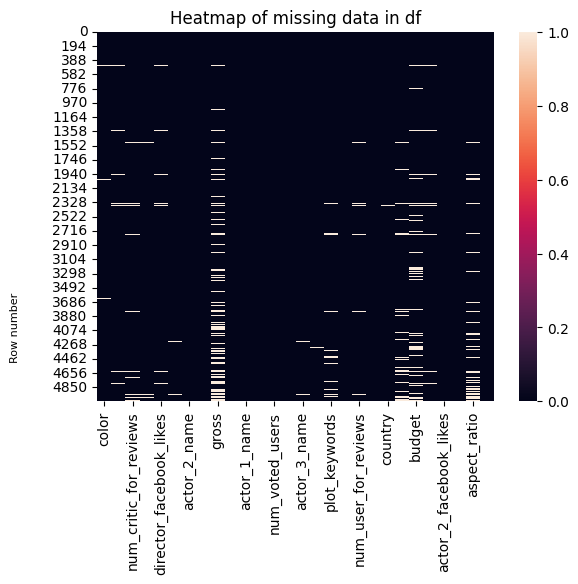

In [6]:
sns.heatmap(df.isnull())
plt.title('Heatmap of missing data in df')
plt.annotate('Row number', xy=(-0.2, 0.2), xytext=(-2, 0),
             xycoords='axes fraction', textcoords='offset points',
             rotation=90, ha='center', va='center', fontsize=8)
plt.show()

Summary: 

We have 5043 entries (rows) , of which the variable "gross" has around ~17.53%  missing data, followed by budget ~10%, aspect_ratio 6.5%, content_rating 6%, , aspect_ratio ~7.5%. 
Variables such as plot_keywords are missing 3%, director_name 2% and other variables are missing less than 2% of data. Missing values are a common and complex challenge in research. 

#2.1.1. Null value treatment

In [7]:
#Object data types are in the categorical data list
categorical_data = [col for col in df.columns if df[col].dtype == 'object']

#Numeric / continous data are other variables, i.e. float / integer

numerical_data = [col for col in df.columns if df[col].dtype != 'object']


In [8]:
categorical_data, numerical_data

(['color',
  'director_name',
  'actor_2_name',
  'genres',
  'actor_1_name',
  'movie_title',
  'actor_3_name',
  'plot_keywords',
  'movie_imdb_link',
  'language',
  'country',
  'content_rating'],
 ['num_critic_for_reviews',
  'duration',
  'director_facebook_likes',
  'actor_3_facebook_likes',
  'actor_1_facebook_likes',
  'gross',
  'num_voted_users',
  'cast_total_facebook_likes',
  'facenumber_in_poster',
  'num_user_for_reviews',
  'budget',
  'title_year',
  'actor_2_facebook_likes',
  'imdb_score',
  'aspect_ratio',
  'movie_facebook_likes'])

#2.2. Descriptive Statistics

In [9]:
df[numerical_data].describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


In [10]:
df[categorical_data].describe()

,color,director_name,actor_2_name,genres,actor_1_name,movie_title,actor_3_name,plot_keywords,movie_imdb_link,language,country,content_rating
count,5024,4939,5030,5043,5036,5043,5020,4890,5043,5031,5038,4740
unique,2,2398,3032,914,2097,4917,3521,4760,4919,47,65,18
top,Color,Steven Spielberg,Morgan Freeman,Drama,Robert De Niro,Ben-Hur,John Heard,based on novel,http://www.imdb.com/title/tt0232500/?ref_=fn_t...,English,USA,R
freq,4815,26,20,236,49,3,8,4,3,4704,3807,2118


Calculation of Missing value ratio

In [11]:
total_rows = df.shape[0]
missing_ratio = (df.isnull().sum() / total_rows) * 100

print("Missing value ratio for each column:")
print(missing_ratio)

Missing value ratio for each column:
color                         0.376760
director_name                 2.062265
num_critic_for_reviews        0.991473
duration                      0.297442
director_facebook_likes       2.062265
actor_3_facebook_likes        0.456078
actor_2_name                  0.257783
actor_1_facebook_likes        0.138806
gross                        17.529248
genres                        0.000000
actor_1_name                  0.138806
movie_title                   0.000000
num_voted_users               0.000000
cast_total_facebook_likes     0.000000
actor_3_name                  0.456078
facenumber_in_poster          0.257783
plot_keywords                 3.033908
movie_imdb_link               0.000000
num_user_for_reviews          0.416419
language                      0.237954
country                       0.099147
content_rating                6.008328
budget                        9.756098
title_year                    2.141582
actor_2_facebook_likes     

The visual shows there are ~4800 "color" movies and ~200 "Black and White" movies. Given the small missing value size, I will use Mode Imputation to replace missing values. Furthermore, the movie years range from 1916 to 2016, it seems reasonable to assume most movies nowadays will be streamed in color.

Dropping missing values

Other categorical variables were missing >3% of its data. 
Given the high variety of unique elements, all these will be removed.

In [12]:
df.dropna(axis = 0, subset = ['director_name'], inplace = True )
df.dropna(axis = 0, subset = ['actor_2_name'], inplace = True )
df.dropna(axis = 0, subset = ['genres'], inplace = True )
df.dropna(axis = 0, subset = ['actor_1_name'], inplace = True )
df.dropna(axis = 0, subset = ['movie_title'], inplace = True )
df.dropna(axis = 0, subset = ['plot_keywords'], inplace = True )
df.dropna(axis = 0, subset = ['country'], inplace = True )
df.dropna(axis = 0, subset = ['content_rating'], inplace = True )
df.dropna(axis = 0, subset = ['actor_3_name'], inplace = True )
df.dropna(axis = 0, subset = ['language'], inplace = True )
df.dropna(axis = 0, subset = ['color'], inplace = True )

categorical_missing_values_sum = df[categorical_data].isnull().sum()
categorical_missing_values_sum

color              0
director_name      0
actor_2_name       0
genres             0
actor_1_name       0
movie_title        0
actor_3_name       0
plot_keywords      0
movie_imdb_link    0
language           0
country            0
content_rating     0
dtype: int64

In [13]:
df.dropna(axis = 0, subset = ['num_critic_for_reviews'], inplace = True )
df.dropna(axis = 0, subset = ['duration'], inplace = True )
df.dropna(axis = 0, subset = ['genres'], inplace = True )
df.dropna(axis = 0, subset = ['director_facebook_likes'], inplace = True )
df.dropna(axis = 0, subset = ['actor_3_facebook_likes'], inplace = True )
df.dropna(axis = 0, subset = ['actor_1_facebook_likes'], inplace = True )
df.dropna(axis = 0, subset = ['gross'], inplace = True )
df.dropna(axis = 0, subset = ['num_user_for_reviews'], inplace = True )
df.dropna(axis = 0, subset = ['aspect_ratio'], inplace = True )
df.dropna(axis = 0, subset = ['facenumber_in_poster'], inplace = True )
df.dropna(axis = 0, subset = ['budget'], inplace = True )

numerical_missing_values_sum = df[numerical_data].isnull().sum()
numerical_missing_values_sum 


num_critic_for_reviews       0
duration                     0
director_facebook_likes      0
actor_3_facebook_likes       0
actor_1_facebook_likes       0
gross                        0
num_voted_users              0
cast_total_facebook_likes    0
facenumber_in_poster         0
num_user_for_reviews         0
budget                       0
title_year                   0
actor_2_facebook_likes       0
imdb_score                   0
aspect_ratio                 0
movie_facebook_likes         0
dtype: int64

In [14]:
After_missing_value_treatment = 100/5043*3756
After_missing_value_treatment

74.4794765020821

Treating missing values in the dataset resulted in a lost of around 25.5% of the data

In [15]:
df[categorical_data].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3756 entries, 0 to 5042
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   color            3756 non-null   object
 1   director_name    3756 non-null   object
 2   actor_2_name     3756 non-null   object
 3   genres           3756 non-null   object
 4   actor_1_name     3756 non-null   object
 5   movie_title      3756 non-null   object
 6   actor_3_name     3756 non-null   object
 7   plot_keywords    3756 non-null   object
 8   movie_imdb_link  3756 non-null   object
 9   language         3756 non-null   object
 10  country          3756 non-null   object
 11  content_rating   3756 non-null   object
dtypes: object(12)
memory usage: 381.5+ KB


Color

In [16]:
#Categorical column: Color 


df['color'].unique()
#array(['Color', ' Black and White'], dtype=object)
#There are two different categories. Therefore, Black and White will be encoded 0 and Color 1.



array(['Color', ' Black and White'], dtype=object)

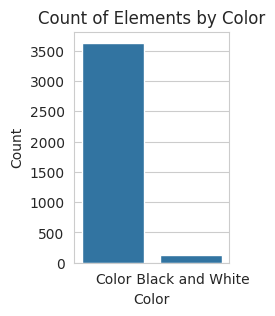

In [17]:
sns.set_style("whitegrid")
color_counts = df['color'].value_counts(dropna=False)

# Creation of a bar plot
plt.figure(figsize=(2, 3))
sns.barplot(x=color_counts.index, y=color_counts.values)

plt.xlabel("Color")
plt.ylabel("Count")
plt.title("Count of Elements by Color")

plt.show()

In [18]:
df['color'] = df.color.map({'Color' : 1 , ' Black and White' : 0})
df['color'] 

0       1
1       1
2       1
3       1
5       1
       ..
5026    1
5027    1
5033    1
5035    1
5042    1
Name: color, Length: 3756, dtype: int64

Director_name

In [19]:
df['director_name'].nunique, df.director_name.unique()


(<bound method IndexOpsMixin.nunique of 0           James Cameron
 1          Gore Verbinski
 2              Sam Mendes
 3       Christopher Nolan
 5          Andrew Stanton
               ...        
 5026      Olivier Assayas
 5027         Jafar Panahi
 5033        Shane Carruth
 5035     Robert Rodriguez
 5042             Jon Gunn
 Name: director_name, Length: 3756, dtype: object>,
 array(['James Cameron', 'Gore Verbinski', 'Sam Mendes', ...,
        'Kevin Jordan', 'Jafar Panahi', 'Shane Carruth'], dtype=object))

In [20]:

director_name_value_counts = df['director_name'].value_counts()

In [21]:
director_name_value_counts = pd.DataFrame(director_name_value_counts).reset_index().rename(columns={'index': 'director_name', 'director_name': 'valuecounts_director_name', 'count' : 'count_valuecounts_director_name'})
director_name_value_counts

,director_name,valuecounts_director_name
0,Steven Spielberg,25
1,Clint Eastwood,19
2,Woody Allen,19
3,Ridley Scott,17
4,Martin Scorsese,16
...,...,...
1654,Todd Lincoln,1
1655,Julian Jarrold,1
1656,Peter Farrelly,1
1657,Michel Hazanavicius,1


In [22]:
df = pd.merge(df, director_name_value_counts , left_on = 'director_name', right_on = 'director_name', how = 'left')


In [23]:
df['valuecounts_director_name']

0        7
1        7
2        8
3        8
4        3
        ..
3751     2
3752     1
3753     1
3754    13
3755     2
Name: valuecounts_director_name, Length: 3756, dtype: int64

In [24]:
df = df.drop(columns = 'director_name')
df

,color,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,valuecounts_director_name
0,1,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,...,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,7
1,1,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,...,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,7
2,1,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,...,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,8
3,1,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,...,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,8
4,1,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,...,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3751,1,81.0,110.0,107.0,45.0,Béatrice Dalle,576.0,136007.0,Drama|Music|Romance,Maggie Cheung,...,French,France,R,4500.0,2004.0,133.0,6.9,2.35,171,2
3752,1,64.0,90.0,397.0,0.0,Nargess Mamizadeh,5.0,673780.0,Drama,Fereshteh Sadre Orafaiy,...,Persian,Iran,Not Rated,10000.0,2000.0,0.0,7.5,1.85,697,1
3753,1,143.0,77.0,291.0,8.0,David Sullivan,291.0,424760.0,Drama|Sci-Fi|Thriller,Shane Carruth,...,English,USA,PG-13,7000.0,2004.0,45.0,7.0,1.85,19000,1
3754,1,56.0,81.0,0.0,6.0,Peter Marquardt,121.0,2040920.0,Action|Crime|Drama|Romance|Thriller,Carlos Gallardo,...,Spanish,USA,R,7000.0,1992.0,20.0,6.9,1.37,0,13


actor_2_name

In [25]:
df['actor_2_name'].unique(), df['actor_2_name'].nunique()

(array(['Joel David Moore', 'Orlando Bloom', 'Rory Kinnear', ...,
        'David Sullivan', 'Peter Marquardt', 'Brian Herzlinger'],
       dtype=object),
 2188)

In [26]:
actor_2_name_value_counts = df['actor_2_name'].value_counts()
actor_2_name_value_counts

Morgan Freeman      20
Charlize Theron     14
Brad Pitt           14
James Franco        11
Meryl Streep        10
                    ..
Mary McCormack       1
Bob Clendenin        1
Oleg Taktarov        1
Richard Sammel       1
Brian Herzlinger     1
Name: actor_2_name, Length: 2188, dtype: int64

In [27]:
actor_2_name_value_counts = pd.DataFrame(actor_2_name_value_counts).reset_index().rename(columns={'index': 'actor_2_name', 'actor_2_name':'actor_2_name_value_counts', 'count' : 'count_actor_2_name_value_counts'})
actor_2_name_value_counts

,actor_2_name,actor_2_name_value_counts
0,Morgan Freeman,20
1,Charlize Theron,14
2,Brad Pitt,14
3,James Franco,11
4,Meryl Streep,10
...,...,...
2183,Mary McCormack,1
2184,Bob Clendenin,1
2185,Oleg Taktarov,1
2186,Richard Sammel,1


In [28]:
df = pd.merge(df, actor_2_name_value_counts, left_on = 'actor_2_name', right_on = 'actor_2_name', how = 'left')
df

,color,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,valuecounts_director_name,actor_2_name_value_counts
0,1,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,...,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,7,3
1,1,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,...,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,7,7
2,1,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,...,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,8,2
3,1,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,...,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,8,5
4,1,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,...,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3751,1,81.0,110.0,107.0,45.0,Béatrice Dalle,576.0,136007.0,Drama|Music|Romance,Maggie Cheung,...,France,R,4500.0,2004.0,133.0,6.9,2.35,171,2,1
3752,1,64.0,90.0,397.0,0.0,Nargess Mamizadeh,5.0,673780.0,Drama,Fereshteh Sadre Orafaiy,...,Iran,Not Rated,10000.0,2000.0,0.0,7.5,1.85,697,1,1
3753,1,143.0,77.0,291.0,8.0,David Sullivan,291.0,424760.0,Drama|Sci-Fi|Thriller,Shane Carruth,...,USA,PG-13,7000.0,2004.0,45.0,7.0,1.85,19000,1,1
3754,1,56.0,81.0,0.0,6.0,Peter Marquardt,121.0,2040920.0,Action|Crime|Drama|Romance|Thriller,Carlos Gallardo,...,USA,R,7000.0,1992.0,20.0,6.9,1.37,0,13,1


In [29]:
df = df.drop(columns = 'actor_2_name')

Genres

In [30]:
df['genres'].unique(), df['genres'].nunique() 
#There are 745 unique genres values. Given this large amount of unique values separated by the delimiter, a new column with the first element from the array is created.

(array(['Action|Adventure|Fantasy|Sci-Fi', 'Action|Adventure|Fantasy',
        'Action|Adventure|Thriller', 'Action|Thriller',
        'Action|Adventure|Sci-Fi', 'Action|Adventure|Romance',
        'Adventure|Animation|Comedy|Family|Fantasy|Musical|Romance',
        'Adventure|Family|Fantasy|Mystery', 'Action|Adventure',
        'Action|Adventure|Western', 'Action|Adventure|Family|Fantasy',
        'Action|Adventure|Comedy|Family|Fantasy|Sci-Fi',
        'Adventure|Fantasy', 'Action|Adventure|Drama|History',
        'Adventure|Family|Fantasy', 'Action|Adventure|Drama|Romance',
        'Drama|Romance', 'Action|Adventure|Sci-Fi|Thriller',
        'Action|Adventure|Fantasy|Romance',
        'Action|Adventure|Fantasy|Sci-Fi|Thriller',
        'Adventure|Animation|Comedy|Family|Fantasy',
        'Adventure|Animation|Comedy|Family|Sport', 'Action|Crime|Thriller',
        'Action|Adventure|Horror|Sci-Fi|Thriller',
        'Adventure|Animation|Family|Sci-Fi',
        'Action|Comedy|Crime|Thril

In [31]:
df['splitted_genres'] = df.genres.str.split('|').str[0]
df['splitted_genres']

0            Action
1            Action
2            Action
3            Action
4            Action
           ...     
3751          Drama
3752          Drama
3753          Drama
3754         Action
3755    Documentary
Name: splitted_genres, Length: 3756, dtype: object

In [32]:
df['splitted_genres'].unique(), df['splitted_genres'].nunique()

(array(['Action', 'Adventure', 'Drama', 'Animation', 'Comedy', 'Mystery',
        'Crime', 'Biography', 'Fantasy', 'Documentary', 'Sci-Fi', 'Horror',
        'Romance', 'Family', 'Western', 'Musical', 'Thriller'],
       dtype=object),
 17)

In [33]:
#Transforming both categorical feature into numerical value.
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['splitted_genres'] = le.fit_transform(df.splitted_genres) 


In [34]:
value_counts_splitted_genres = df['genres'].value_counts()
value_counts_splitted_genres

Comedy|Drama|Romance                     147
Drama                                    141
Comedy|Drama                             138
Comedy                                   138
Comedy|Romance                           131
                                        ... 
Action|Drama|Fantasy|Horror|Thriller       1
Action|Thriller|Western                    1
Action|Adventure|Drama|Family              1
Animation|Comedy|Family|Music|Romance      1
Comedy|Crime|Horror                        1
Name: genres, Length: 745, dtype: int64

In [35]:
value_counts_genres = df['genres'].value_counts()
value_counts_genres

Comedy|Drama|Romance                     147
Drama                                    141
Comedy|Drama                             138
Comedy                                   138
Comedy|Romance                           131
                                        ... 
Action|Drama|Fantasy|Horror|Thriller       1
Action|Thriller|Western                    1
Action|Adventure|Drama|Family              1
Animation|Comedy|Family|Music|Romance      1
Comedy|Crime|Horror                        1
Name: genres, Length: 745, dtype: int64

In [36]:
value_counts_genres  = pd.DataFrame(value_counts_genres).reset_index().rename(columns = {'index' : 'genres', 'genres' : 'value_counts_genres'})
value_counts_genres

,genres,value_counts_genres
0,Comedy|Drama|Romance,147
1,Drama,141
2,Comedy|Drama,138
3,Comedy,138
4,Comedy|Romance,131
...,...,...
740,Action|Drama|Fantasy|Horror|Thriller,1
741,Action|Thriller|Western,1
742,Action|Adventure|Drama|Family,1
743,Animation|Comedy|Family|Music|Romance,1


In [37]:
df = pd.merge(df, value_counts_genres, left_on = 'genres', right_on = 'genres', how = 'left')
df


,color,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,...,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,valuecounts_director_name,actor_2_name_value_counts,splitted_genres,value_counts_genres
0,1,723.0,178.0,0.0,855.0,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,...,237000000.0,2009.0,936.0,7.9,1.78,33000,7,3,0,12
1,1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,...,300000000.0,2007.0,5000.0,7.1,2.35,0,7,7,0,25
2,1,602.0,148.0,0.0,161.0,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,...,245000000.0,2015.0,393.0,6.8,2.35,85000,8,2,0,45
3,1,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,...,250000000.0,2012.0,23000.0,8.5,2.35,164000,8,5,0,22
4,1,462.0,132.0,475.0,530.0,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,...,263700000.0,2012.0,632.0,6.6,2.35,24000,3,3,0,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3751,1,81.0,110.0,107.0,45.0,576.0,136007.0,Drama|Music|Romance,Maggie Cheung,Clean,...,4500.0,2004.0,133.0,6.9,2.35,171,2,1,7,17
3752,1,64.0,90.0,397.0,0.0,5.0,673780.0,Drama,Fereshteh Sadre Orafaiy,The Circle,...,10000.0,2000.0,0.0,7.5,1.85,697,1,1,7,141
3753,1,143.0,77.0,291.0,8.0,291.0,424760.0,Drama|Sci-Fi|Thriller,Shane Carruth,Primer,...,7000.0,2004.0,45.0,7.0,1.85,19000,1,1,7,12
3754,1,56.0,81.0,0.0,6.0,121.0,2040920.0,Action|Crime|Drama|Romance|Thriller,Carlos Gallardo,El Mariachi,...,7000.0,1992.0,20.0,6.9,1.37,0,13,1,0,6


In [38]:
df = df.drop(columns = 'genres')

actor_1_name

In [39]:
df['actor_1_name'].unique, df['actor_1_name'].nunique
#Shows high cardinality. However, there 3755 distinct actors_1_name , meaning each actor_1_name appears only ones.

(<bound method Series.unique of 0                   CCH Pounder
 1                   Johnny Depp
 2               Christoph Waltz
 3                     Tom Hardy
 4                  Daryl Sabara
                  ...           
 3751              Maggie Cheung
 3752    Fereshteh Sadre Orafaiy
 3753              Shane Carruth
 3754            Carlos Gallardo
 3755                John August
 Name: actor_1_name, Length: 3756, dtype: object>,
 <bound method IndexOpsMixin.nunique of 0                   CCH Pounder
 1                   Johnny Depp
 2               Christoph Waltz
 3                     Tom Hardy
 4                  Daryl Sabara
                  ...           
 3751              Maggie Cheung
 3752    Fereshteh Sadre Orafaiy
 3753              Shane Carruth
 3754            Carlos Gallardo
 3755                John August
 Name: actor_1_name, Length: 3756, dtype: object>)

In [40]:
actor_1_name_value_counts = df['actor_1_name'].value_counts()
actor_1_name_value_counts 

Robert De Niro       42
Johnny Depp          39
J.K. Simmons         31
Nicolas Cage         31
Denzel Washington    30
                     ..
Marisa Saks           1
Peter Firth           1
Isaiah Washington     1
Johnny Lewis          1
John August           1
Name: actor_1_name, Length: 1428, dtype: int64

In [41]:
actor_1_name_value_counts = pd.DataFrame(actor_1_name_value_counts).reset_index().rename(columns = {'index': 'actor_1_name', 'actor_1_name' : 'actor_1_name_value_counts'})
actor_1_name_value_counts

,actor_1_name,actor_1_name_value_counts
0,Robert De Niro,42
1,Johnny Depp,39
2,J.K. Simmons,31
3,Nicolas Cage,31
4,Denzel Washington,30
...,...,...
1423,Marisa Saks,1
1424,Peter Firth,1
1425,Isaiah Washington,1
1426,Johnny Lewis,1


In [42]:
df = pd.merge(df, actor_1_name_value_counts, left_on = 'actor_1_name', right_on = 'actor_1_name', how = 'left')
df

,color,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,actor_1_name,movie_title,num_voted_users,...,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,valuecounts_director_name,actor_2_name_value_counts,splitted_genres,value_counts_genres,actor_1_name_value_counts
0,1,723.0,178.0,0.0,855.0,1000.0,760505847.0,CCH Pounder,Avatar,886204,...,2009.0,936.0,7.9,1.78,33000,7,3,0,12,4
1,1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,Johnny Depp,Pirates of the Caribbean: At World's End,471220,...,2007.0,5000.0,7.1,2.35,0,7,7,0,25,39
2,1,602.0,148.0,0.0,161.0,11000.0,200074175.0,Christoph Waltz,Spectre,275868,...,2015.0,393.0,6.8,2.35,85000,8,2,0,45,5
3,1,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,Tom Hardy,The Dark Knight Rises,1144337,...,2012.0,23000.0,8.5,2.35,164000,8,5,0,22,9
4,1,462.0,132.0,475.0,530.0,640.0,73058679.0,Daryl Sabara,John Carter,212204,...,2012.0,632.0,6.6,2.35,24000,3,3,0,48,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3751,1,81.0,110.0,107.0,45.0,576.0,136007.0,Maggie Cheung,Clean,3924,...,2004.0,133.0,6.9,2.35,171,2,1,7,17,1
3752,1,64.0,90.0,397.0,0.0,5.0,673780.0,Fereshteh Sadre Orafaiy,The Circle,4555,...,2000.0,0.0,7.5,1.85,697,1,1,7,141,1
3753,1,143.0,77.0,291.0,8.0,291.0,424760.0,Shane Carruth,Primer,72639,...,2004.0,45.0,7.0,1.85,19000,1,1,7,12,1
3754,1,56.0,81.0,0.0,6.0,121.0,2040920.0,Carlos Gallardo,El Mariachi,52055,...,1992.0,20.0,6.9,1.37,0,13,1,0,6,1


In [43]:
df = df.drop(columns = 'actor_1_name')

movie_title

In [44]:
df = df.drop(columns = 'movie_title')

actor_3_name

In [45]:
df['actor_3_name'].unique, df['actor_3_name'].nunique

(<bound method Series.unique of 0                  Wes Studi
 1             Jack Davenport
 2           Stephanie Sigman
 3       Joseph Gordon-Levitt
 4               Polly Walker
                 ...         
 3751            Don McKellar
 3752        Mojgan Faramarzi
 3753            Casey Gooden
 3754          Consuelo Gómez
 3755                Jon Gunn
 Name: actor_3_name, Length: 3756, dtype: object>,
 <bound method IndexOpsMixin.nunique of 0                  Wes Studi
 1             Jack Davenport
 2           Stephanie Sigman
 3       Joseph Gordon-Levitt
 4               Polly Walker
                 ...         
 3751            Don McKellar
 3752        Mojgan Faramarzi
 3753            Casey Gooden
 3754          Consuelo Gómez
 3755                Jon Gunn
 Name: actor_3_name, Length: 3756, dtype: object>)

In [46]:
actor_3_name_value_counts = df['actor_3_name'].value_counts()
actor_3_name_value_counts 


Steve Coogan             8
Ben Mendelsohn           7
Robert Duvall            7
Kirsten Dunst            7
Anne Hathaway            7
                        ..
Randall Park             1
Robin Shou               1
John Macmillan           1
Tisha Campbell-Martin    1
Jon Gunn                 1
Name: actor_3_name, Length: 2587, dtype: int64

In [47]:

actor_3_name_value_counts = pd.DataFrame(actor_3_name_value_counts).reset_index().rename(columns = {'index': 'actor_3_name', 'actor_3_name' : 'actor_3_name_value_counts'})

actor_3_name_value_counts

,actor_3_name,actor_3_name_value_counts
0,Steve Coogan,8
1,Ben Mendelsohn,7
2,Robert Duvall,7
3,Kirsten Dunst,7
4,Anne Hathaway,7
...,...,...
2582,Randall Park,1
2583,Robin Shou,1
2584,John Macmillan,1
2585,Tisha Campbell-Martin,1


In [48]:
df = pd.merge(df, actor_3_name_value_counts, left_on = 'actor_3_name', right_on = 'actor_3_name', how = 'left')


In [49]:
df = df.drop(columns = 'actor_3_name')


plot_keywords

In [50]:
df.plot_keywords.unique(), df.plot_keywords.nunique()


(array(['avatar|future|marine|native|paraplegic',
        'goddess|marriage ceremony|marriage proposal|pirate|singapore',
        'bomb|espionage|sequel|spy|terrorist', ...,
        'changing the future|independent film|invention|nonlinear timeline|time travel',
        'assassin|death|guitar|gun|mariachi',
        'actress name in title|crush|date|four word title|video camera'],
       dtype=object),
 3656)

In [51]:
df['main_plot_keyword'] = df.plot_keywords.str.split('|').str[0]
df['main_plot_keyword']


0                      avatar
1                     goddess
2                        bomb
3                   deception
4                       alien
                ...          
3751                     jail
3752                 abortion
3753      changing the future
3754                 assassin
3755    actress name in title
Name: main_plot_keyword, Length: 3756, dtype: object

In [52]:
#df = df.drop(columns = 'plot_keywords')

In [53]:
df.main_plot_keyword.unique(), df.main_plot_keyword.nunique()

(array(['avatar', 'goddess', 'bomb', ..., 'jail', 'changing the future',
        'actress name in title'], dtype=object),
 1645)

In [54]:
main_plot_keyword_value_counts = df.main_plot_keyword.value_counts()
main_plot_keyword_value_counts

alien                    69
death                    41
boy                      36
best friend              32
box office flop          28
                         ..
capitalist                1
crocodile                 1
hijack                    1
earl of oxford            1
actress name in title     1
Name: main_plot_keyword, Length: 1645, dtype: int64

In [55]:
main_plot_keyword_value_counts = pd.DataFrame(main_plot_keyword_value_counts).reset_index().rename(columns = {'index' : 'main_plot_keyword', 'main_plot_keyword' : 'main_plot_keyword_value_counts'})
main_plot_keyword_value_counts

,main_plot_keyword,main_plot_keyword_value_counts
0,alien,69
1,death,41
2,boy,36
3,best friend,32
4,box office flop,28
...,...,...
1640,capitalist,1
1641,crocodile,1
1642,hijack,1
1643,earl of oxford,1


In [56]:
#df = pd.merge(df, main_plot_keyword_value_counts, left_on = 'plot_keywords', right_on = 'main_plot_keyword_value_counts', how = 'left')

In [57]:
df = df.drop(columns = 'plot_keywords')

In [58]:
df = df.drop(columns = 'main_plot_keyword') #high cardinality

movie_imdb_link

In [59]:
df.movie_imdb_link.unique(), df.movie_imdb_link.nunique()


(array(['http://www.imdb.com/title/tt0499549/?ref_=fn_tt_tt_1',
        'http://www.imdb.com/title/tt0449088/?ref_=fn_tt_tt_1',
        'http://www.imdb.com/title/tt2379713/?ref_=fn_tt_tt_1', ...,
        'http://www.imdb.com/title/tt0390384/?ref_=fn_tt_tt_1',
        'http://www.imdb.com/title/tt0104815/?ref_=fn_tt_tt_1',
        'http://www.imdb.com/title/tt0378407/?ref_=fn_tt_tt_1'],
       dtype=object),
 3656)

In [60]:
df = df.drop(columns = 'movie_imdb_link')

language

In [61]:
df['language'].unique(), df['language'].nunique()

(array(['English', 'Mandarin', 'Aboriginal', 'Spanish', 'French',
        'Filipino', 'Maya', 'Kazakh', 'Cantonese', 'Japanese', 'Aramaic',
        'Italian', 'Dutch', 'Dari', 'German', 'Mongolian', 'Thai',
        'Bosnian', 'Korean', 'Hungarian', 'Hindi', 'Danish', 'Portuguese',
        'Norwegian', 'Czech', 'Russian', 'None', 'Zulu', 'Hebrew',
        'Arabic', 'Vietnamese', 'Indonesian', 'Romanian', 'Persian'],
       dtype=object),
 34)

In [62]:
from sklearn.preprocessing import LabelEncoder

le1 = LabelEncoder()
df['language'] = le1.fit_transform(df['language'])
df['language']

0        9
1        9
2        9
3        9
4        9
        ..
3751    11
3752    26
3753     9
3754    30
3755     9
Name: language, Length: 3756, dtype: int64

country

In [63]:
df['country'].unique(), df['country'].nunique()

(array(['USA', 'UK', 'New Zealand', 'Canada', 'Australia', 'Germany',
        'China', 'New Line', 'France', 'Japan', 'Spain', 'Hong Kong',
        'Czech Republic', 'Peru', 'South Korea', 'Aruba', 'Denmark',
        'Ireland', 'South Africa', 'Italy', 'Romania', 'Chile',
        'Netherlands', 'Hungary', 'Russia', 'Belgium', 'Greece', 'Taiwan',
        'Official site', 'Thailand', 'Iran', 'West Germany', 'Georgia',
        'India', 'Mexico', 'Brazil', 'Finland', 'Norway', 'Iceland',
        'Argentina', 'Colombia', 'Poland', 'Israel', 'Indonesia',
        'Afghanistan'], dtype=object),
 45)

In [64]:
from sklearn.preprocessing import LabelEncoder
le2 = LabelEncoder()
df['country'] = le2.fit_transform(df['country'])
df['country']

0       43
1       43
2       42
3       43
4       43
        ..
3751    13
3752    22
3753    43
3754    43
3755    43
Name: country, Length: 3756, dtype: int64

content_rating

In [65]:
df['content_rating'].unique(), df['content_rating'].nunique()

(array(['PG-13', 'PG', 'G', 'R', 'Approved', 'NC-17', 'X', 'Not Rated',
        'Unrated', 'M', 'GP', 'Passed'], dtype=object),
 12)

In [66]:
from sklearn.preprocessing import LabelEncoder
le3 = LabelEncoder()
df['content_rating'] = le3.fit_transform(df['content_rating'])

In [67]:
#The Profile Report after data cleaning

#profile = ProfileReport(df, title = "Profile Report", explorative = True)
#profile.to_file("profile_report.html")

3. Building the Linear Regression Model

In [68]:
df_Regression = df.copy() #for the Regression model


3.1. Splitting the dataset into Train and Test

In [69]:
from sklearn.model_selection import train_test_split

y = df_Regression.pop('imdb_score') #removing feature variables
#ensure it only contains the target variable "imdb_score"

In [70]:
X = df_Regression
X.head() ##ensure it only contains feature variables

,color,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,...,title_year,actor_2_facebook_likes,aspect_ratio,movie_facebook_likes,valuecounts_director_name,actor_2_name_value_counts,splitted_genres,value_counts_genres,actor_1_name_value_counts,actor_3_name_value_counts
0,1,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,...,2009.0,936.0,1.78,33000,7,3,0,12,4,3
1,1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,0.0,...,2007.0,5000.0,2.35,0,7,7,0,25,39,4
2,1,602.0,148.0,0.0,161.0,11000.0,200074175.0,275868,11700,1.0,...,2015.0,393.0,2.35,85000,8,2,0,45,5,1
3,1,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,1144337,106759,0.0,...,2012.0,23000.0,2.35,164000,8,5,0,22,9,2
4,1,462.0,132.0,475.0,530.0,640.0,73058679.0,212204,1873,1.0,...,2012.0,632.0,2.35,24000,3,3,0,48,2,1


Train and Test Dataset

The training dataset will containm  80% of the data, whereas the test dataset will contain 20% of the data. 
The parameter random state ensures reproducibility of the random seed of 42.

The dataset is splitted into train and test before scaling to ensure both datsets metrics won't fit each other.

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 42)
X_train, X_test, y_train, y_test

(      color  num_critic_for_reviews  duration  director_facebook_likes  \
 485       1                   186.0      73.0                     28.0   
 2178      0                   252.0      97.0                      0.0   
 3306      1                   232.0     117.0                    234.0   
 1281      1                   297.0     109.0                      0.0   
 258       1                   297.0     171.0                      0.0   
 ...     ...                     ...       ...                      ...   
 1130      1                   161.0     129.0                     42.0   
 1294      1                   393.0     123.0                   2000.0   
 860       1                   216.0     118.0                    473.0   
 3507      1                   109.0      95.0                      0.0   
 3174      1                    41.0     115.0                    399.0   
 
       actor_3_facebook_likes  actor_1_facebook_likes        gross  \
 485                    847.

In [72]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((3004, 25), (3004,), (752, 25), (752,))

Visualisation with histograms to check for normal distribution.

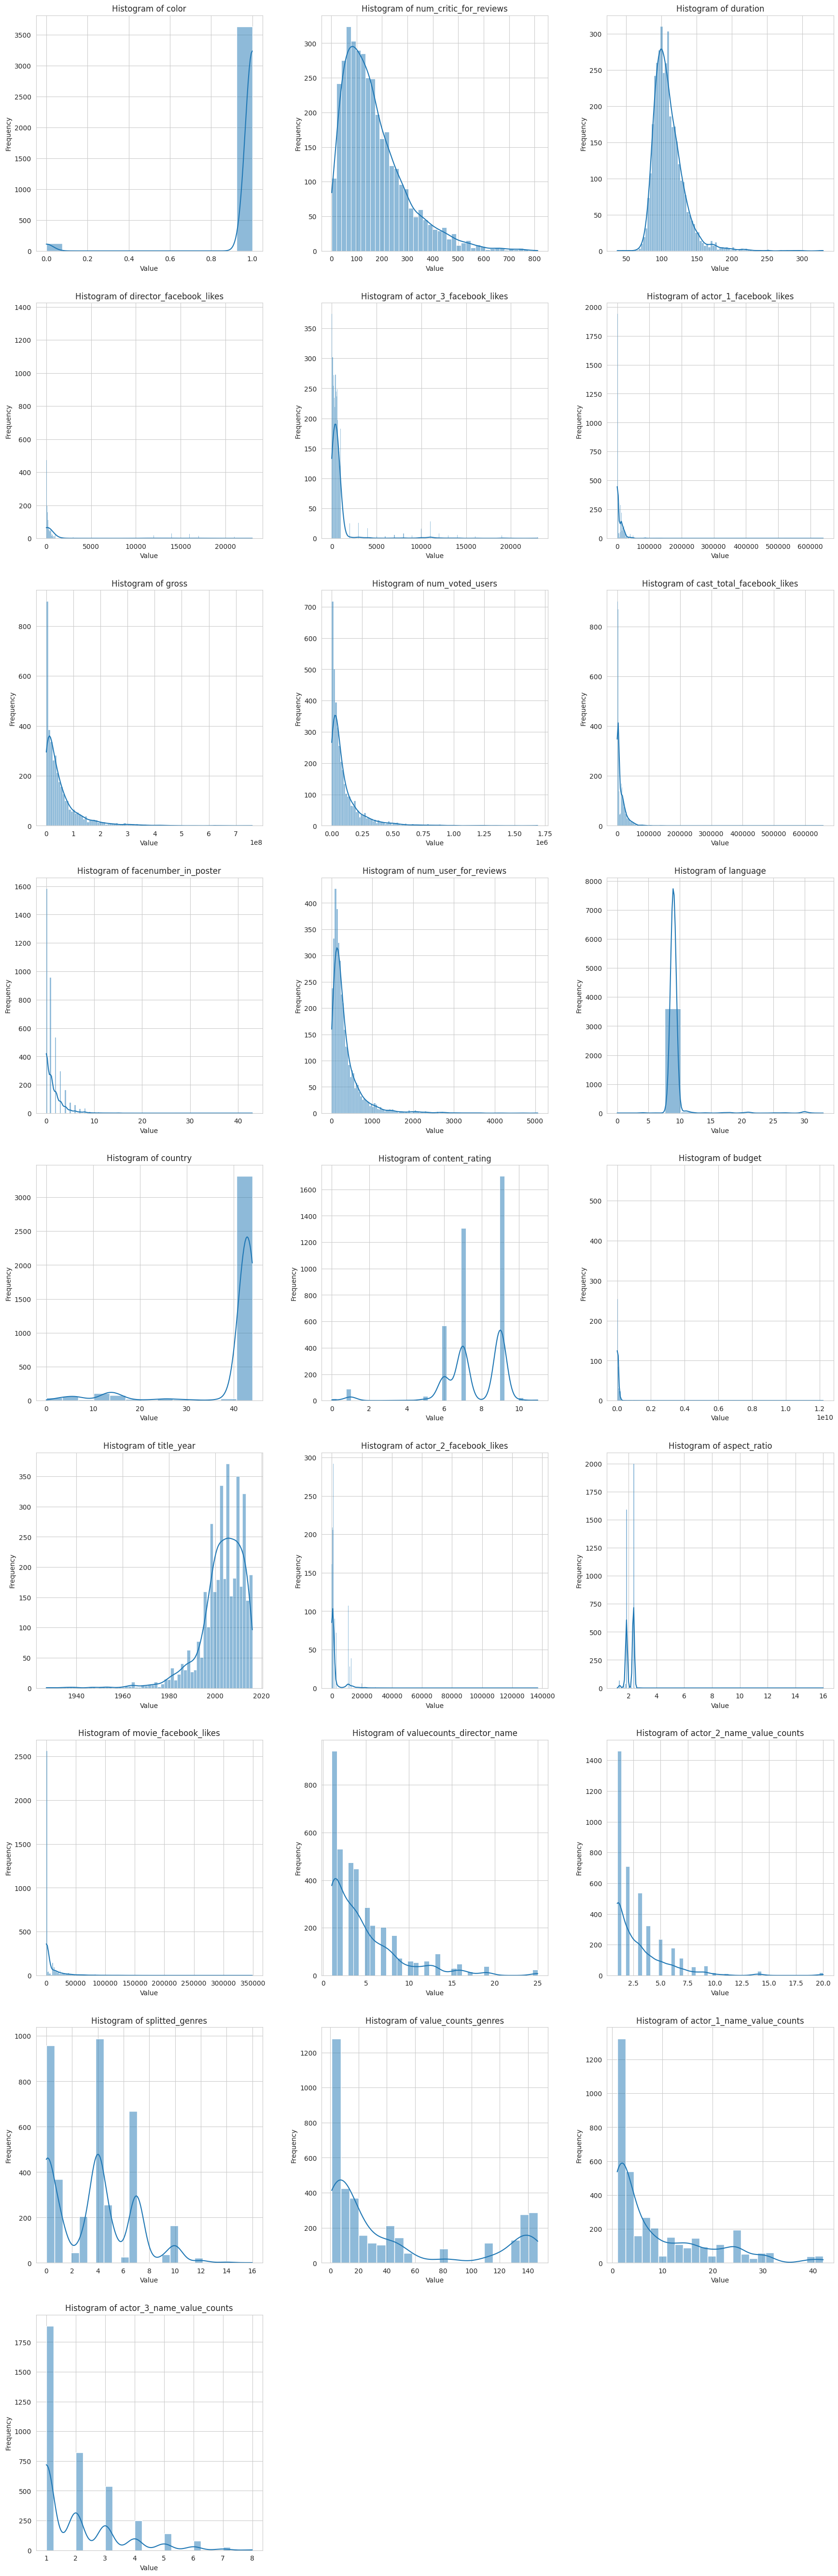

In [73]:
num_cols = len(df_Regression.columns)
num_rows = -(-num_cols // 3)  # Round up division to determine the number of rows needed
plt.figure(figsize=(18, 6*num_rows))  # Adjust figure width and height

# Using iteration through each variable in df_Regression to plot its histogram
for i, col in enumerate(df_Regression.columns):
    plt.subplot(num_rows, 3, i+1)  # Arrange subplots in 3 columns
    sns.histplot(df_Regression[col], kde=True)  # Using Kernel Density Estimation Line
    plt.title(f'Histogram of {col}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')

plt.tight_layout(pad=3.0)  # Increase the padding between subplots
plt.show()

3.2. Scaling

MinMaxScaler

In [74]:
#df.info()

In [75]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train.values), columns=X_train.columns, index=X_train.index)

In [76]:
X_test = pd.DataFrame(scaler.transform(X_test.values), columns = X_train.columns, index = X_test.index)

In [77]:
X_train.shape

(3004, 25)

3.3. Correalation Matrix

In [78]:
# Calculate the correlation matrix
correlation_matrix = X_train.corr().abs()

# Create a boolean mask to identify highly correlated features
high_correlation_mask = correlation_matrix > 0.9

# Exclude diagonal elements (self-correlations)
high_correlation_mask = high_correlation_mask & ~np.eye(correlation_matrix.shape[0], dtype=bool)

# Find the column names with high correlation
high_correlation_columns = set()
for i in range(len(high_correlation_mask.columns)):
    for j in range(i):
        if high_correlation_mask.iloc[i, j]:
            colname = high_correlation_mask.columns[i]
            high_correlation_columns.add(colname)

# Print the column names with high correlation
print("Columns with high correlation (> 90%):", high_correlation_columns)

Columns with high correlation (> 90%): {'cast_total_facebook_likes'}


In [79]:
X_train.shape

(3004, 25)

In [80]:
X_train = X_train.drop(['cast_total_facebook_likes'], axis = 1)
X_test = X_test.drop(['cast_total_facebook_likes'], axis = 1)


In [81]:
X_train.shape

(3004, 24)

3.4. Fitting the Linear Regression Model

In [82]:
from sklearn.linear_model import LinearRegression

In [83]:
lm = LinearRegression()

# Fitting the Linear Regression Model to the training data
lm.fit(X_train, y_train)

LinearRegression()

In [84]:
#Making predictions on the test data

y_pred = lm.predict(X_test)
y_pred

array([ 5.59735967,  7.48238749,  6.06679963,  6.72046999,  5.91315456,
        6.82059355,  8.79745331,  7.07074613,  6.07085012,  6.28646967,
        6.06158285,  6.17272998,  6.02888616,  5.91747835,  6.14654935,
        6.41673411,  6.2329719 ,  6.08585566,  6.03175465,  6.18850136,
        7.36511154,  6.43849396,  6.30339186,  6.46993165,  5.44170057,
        6.16865731,  5.85967888,  5.83237219,  5.70923055,  6.62220132,
        6.74827374,  6.22859369,  6.04488625,  5.47932661,  6.67816156,
        7.75164306,  6.00426328,  7.20982116,  6.33012467,  5.9960653 ,
        8.49436705,  5.69777599,  6.62881565,  5.7425934 ,  6.44721433,
        7.33440135,  5.91438172,  5.92951536,  6.00329602,  6.07786228,
        7.74585606,  5.7950001 ,  7.3470445 ,  5.71936658,  5.9885437 ,
        9.12586511,  6.76522182,  5.90102696,  5.85226996,  6.18038324,
        6.78842968,  6.14352396,  5.92070772,  6.47842432,  6.73710234,
        6.14950232,  5.66394586,  5.17282617,  6.22369586,  5.75

3.5. Linear Regression Model Evaluation

In [85]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("R-squared:", r2)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)



R-squared: 0.3675224956244314
Mean Absolute Error: 0.6452102942280344
Mean Squared Error: 0.7048800978180217


3.5.1. Interpretation of Model Evaluation

- R² measures the proportion of the variance in the dependent variable that is predictable from the features / IV. The R² score of around 0.37 shows a poor fit.
- The Mean Absolute Error (MAE) measures the average absolute difference between the predicted values and the actual values. Lower MAE values indicate a better model performance. The MAE for this Linear Regression model is 0.65, meaning the model performance is low-moderate.
- The Mean Squared Error (MSE) calculates the average of the squared differences between the predicted values and outcome values. The MSE is 0.70 showing a low model performance. 


Hence, the three above mentioned metrics values indicate a poor Linear Regression Model fit, meaning the regression line is not fitting the data correctly. 
Therefore, future research can build more advanced models such as Support Vector Machine Models to fit the data correctly. 

3.6. Adding a constant variable

In [86]:
# Adding a constant variable for using the stats model
import statsmodels.api as sm
X_train_constant = sm.add_constant(X_train)

lm = sm.OLS(y_train , X_train_constant).fit()   

In [87]:
lm = sm.OLS(y_train , X_train_constant).fit()   # Running the linear model

In [88]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:             imdb_score   R-squared:                       0.399
Model:                            OLS   Adj. R-squared:                  0.394
Method:                 Least Squares   F-statistic:                     82.32
Date:                Fri, 12 Apr 2024   Prob (F-statistic):          6.99e-307
Time:                        11:48:25   Log-Likelihood:                -3662.5
No. Observations:                3004   AIC:                             7375.
Df Residuals:                    2979   BIC:                             7525.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [89]:
mean_squared_error(y_pred, y_test)

0.7048800978180217

Having constant feature variables improved R² to around 0.40. Nevertheless, R² still shows a poor fit, demonstrating the regression line doesn't fit the data correctly. Future research can build more advanced models such as Support Vector Machine Models to see if these models fit the data correctly. 